## Load Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/RUStoWorldTrade.csv',
usecols=['Year','Aggregate Level','Reporter ISO','Partner','Partner ISO','Commodity Code','Commodity','Qty Unit','Qty','Netweight (kg)','Trade Value (US$)'])
df = df.convert_dtypes()
df.head()

/var/folders/9_/58l571hj21b2l5n5cprjr_5m0000gn/T/ipykernel_50322/3619025513.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/RUStoWorldTrade.csv',


,Year,Aggregate Level,Reporter ISO,Partner,Partner ISO,Commodity Code,Commodity,Qty Unit,Qty,Netweight (kg),Trade Value (US$)
0,2011,1,RUS,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,No Quantity,<NA>,<NA>,75591
1,2012,1,RUS,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,No Quantity,<NA>,<NA>,27778
2,2015,1,RUS,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,No Quantity,<NA>,<NA>,2131579
3,2016,1,RUS,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,No Quantity,0,0,9055543
4,2017,1,RUS,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,No Quantity,0,0,19952598


## Determine the aggregate level here

In [3]:
df.value_counts('Aggregate Level')  # from 0(few) to 5(many). 
df.value_counts("Reporter ISO")     # all RUS
df.value_counts("Partner")          # many different countries
df.value_counts("Commodity Code")   # many different commodities
df.value_counts("Commodity")        # I think is 1-1 correspond to commodity code
df.value_counts("Qty Unit")         # different units of measurement (kg, number, vol, ...) Quantity: numbers

Qty Unit
Weight in kilograms                                 888709
Number of items                                     276154
No Quantity                                         189714
Volume in litres                                      9332
Number of pairs                                       7492
Volume in cubic meters                                6931
Area in square metres                                 4981
Weight in carats                                       700
Electrical energy in thousands of kilowatt-hours       264
Length in metres                                       206
Number of packages                                      74
Thousands of items                                      46
Name: count, dtype: int64

In [4]:
df = df[df['Aggregate Level'] == 2].reset_index(drop=True) 
df

,Year,Aggregate Level,Reporter ISO,Partner,Partner ISO,Commodity Code,Commodity,Qty Unit,Qty,Netweight (kg),Trade Value (US$)
0,2011,2,RUS,Cayman Isds,CYM,65,"Textile yarn, fabrics, made-up articles, n.e.s...",No Quantity,<NA>,<NA>,75591
1,2012,2,RUS,Cayman Isds,CYM,65,"Textile yarn, fabrics, made-up articles, n.e.s...",No Quantity,<NA>,<NA>,27778
2,2014,2,RUS,Cayman Isds,CYM,89,"Miscellaneous manufactured articles, n.e.s.",No Quantity,<NA>,<NA>,16098
3,2015,2,RUS,Cayman Isds,CYM,68,Non-ferrous metals,No Quantity,<NA>,<NA>,2131579
4,2016,2,RUS,Cayman Isds,CYM,68,Non-ferrous metals,No Quantity,0,0,9055543
...,...,...,...,...,...,...,...,...,...,...,...
79025,2020,2,RUS,Zimbabwe,ZWE,77,"Electrical machinery, apparatus and appliances...",No Quantity,0,0,976
79026,2020,2,RUS,Zimbabwe,ZWE,87,"Professional, scientific and controlling instr...",No Quantity,0,0,38244
79027,2020,2,RUS,Zimbabwe,ZWE,88,"Photographic apparatus, equipment and supplies...",No Quantity,0,0,361
79028,2020,2,RUS,Zimbabwe,ZWE,89,"Miscellaneous manufactured articles, n.e.s.",No Quantity,0,0,4877


In [5]:
df.value_counts('Commodity')

Commodity
Miscellaneous manufactured articles, n.e.s.                                                                                                                                     2043
Manufactures of metals, n.e.s.                                                                                                                                                  2013
General industrial machinery and equipment, n.e.s., and machine parts, n.e.s.                                                                                                   2005
Electrical machinery, apparatus and appliances, n.e.s., and electrical parts thereof (including non-electrical counterparts, n.e.s., of electrical household-type equipment)    1990
Professional, scientific and controlling instruments and apparatus, n.e.s.                                                                                                      1954
                                                                                     

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79030 entries, 0 to 79029
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               79030 non-null  Int64 
 1   Aggregate Level    79030 non-null  Int64 
 2   Reporter ISO       79030 non-null  string
 3   Partner            79030 non-null  string
 4   Partner ISO        78318 non-null  string
 5   Commodity Code     79030 non-null  object
 6   Commodity          79030 non-null  string
 7   Qty Unit           79030 non-null  string
 8   Qty                31621 non-null  Int64 
 9   Netweight (kg)     31556 non-null  Int64 
 10  Trade Value (US$)  79030 non-null  Int64 
dtypes: Int64(5), object(1), string(5)
memory usage: 33.6 MB


In [7]:
df_iso3 = pd.read_csv('data/iso3.csv').convert_dtypes()
df_iso3.head()

,Continent,Region,Country,Capital,FIPS,ISO (2),ISO (3),ISO (No),Internet,Note
0,Asia,South Asia,Afghanistan,Kabul,AF,AF,AFG,4,AF,<NA>
1,Europe,South East Europe,Albania,Tirana,AL,AL,ALB,8,AL,<NA>
2,Africa,Northern Africa,Algeria,Algiers,AG,DZ,DZA,12,DZ,<NA>
3,Oceania,Pacific,American Samoa,Pago Pago,AQ,AS,ASM,16,AS,<NA>
4,Europe,South West Europe,Andorra,Andorra la Vella,AN,AD,AND,20,AD,<NA>


In [8]:
continents = ['Asia', 'Europe', 'Africa', 'Oceania', 'Americas']
region = ['South Asia', 'South East Europe', 'Northern Africa', 'Pacific',
       'South West Europe', 'Southern Africa', 'West Indies',
       'South America', 'South West Asia', 'Central Europe',
       'Eastern Europe', 'Western Europe', 'Central America',
       'Western Africa', 'South East Asia', 'Central Africa',
       'North America', 'East Asia', 'Indian Ocean', 'Northern Europe',
       'Eastern Africa', 'Southern Europe', 'Central Asia',
       'Northern Asia']

for x in continents:        
    y = df_iso3[df_iso3['Continent'] == x]
    m = df['Partner ISO'].isin(y['ISO (3)'])
    df.loc[m, 'Continent'] = x

for x in region:        
    y = df_iso3[df_iso3['Region'] == x]
    m = df['Partner ISO'].isin(y['ISO (3)'])
    df.loc[m, 'Region'] = x

In [9]:
# fill in the continent and region that are nan
partner_info = {
    "Serbia": ("Europe", "South East Europe"),
    "Romania": ("Europe", "Eastern Europe"),
    "China, Hong Kong SAR": ("Asia", "East Asia"),
    "Other Asia, nes": ("Asia", "South East Asia"),
    "Montenegro": ("Europe", "South East Europe"),
    "Dem. Rep. of the Congo": ("Africa", "Central Africa"),
    "Zambia": ("Africa", "Southern Africa"),
    "State of Palestine": ("Asia", "South West Asia"),
    "South Sudan": ("Africa", "Eastern Africa"),
    "Curaçao": ("Americas", "West Indies"),
    "Timor-Leste": ("Asia", "South East Asia"),
    "China, Macao SAR": ("Asia", "East Asia"),
    "Other Europe, nes": ("Europe", "Western Europe"),
    "Br. Indian Ocean Terr.": ("Asia", "Indian Ocean"),
    "Antarctica": ("Oceania", "Antarctic"),
    "Fr. South Antarctic Terr.": ("Oceania", "Antarctic"),
    "Saint Maarten": ("Americas", "West Indies"),
    "Bonaire": ("Americas", "West Indies"),
    "United States Minor Outlying Islands": ("Oceania", "Pacific"),
    "Saint Barthélemy": ("Americas", "West Indies"),
    "Bouvet Island": ("Oceania", "Antarctic")
}

for partner, (continent, region) in partner_info.items():
    mask = df['Partner'] == partner
    df.loc[mask, 'Continent'] = continent
    df.loc[mask, 'Region'] = region


In [10]:
df['Commodity'] = df['Commodity'].replace('Commodities and transactions not classified elsewhere in the SITC', 
                                          'Commodities not classified in the STIC')

,Commodity,Trade Value (US$)
0,Animal oils and fats,38479381
1,"Animal or vegetable fats and oils, processed; ...",343815561
2,Articles of apparel and clothing accessories,4111028875
3,Beverages,6015122067
4,Cereals and cereal preparations,89255280926
...,...,...
61,Textile fibres (other than wool tops and other...,694140567
62,"Textile yarn, fabrics, made-up articles, n.e.s...",5905828901
63,Tobacco and tobacco manufactures,7801309867
64,"Travel goods, handbags and similar containers",365303760


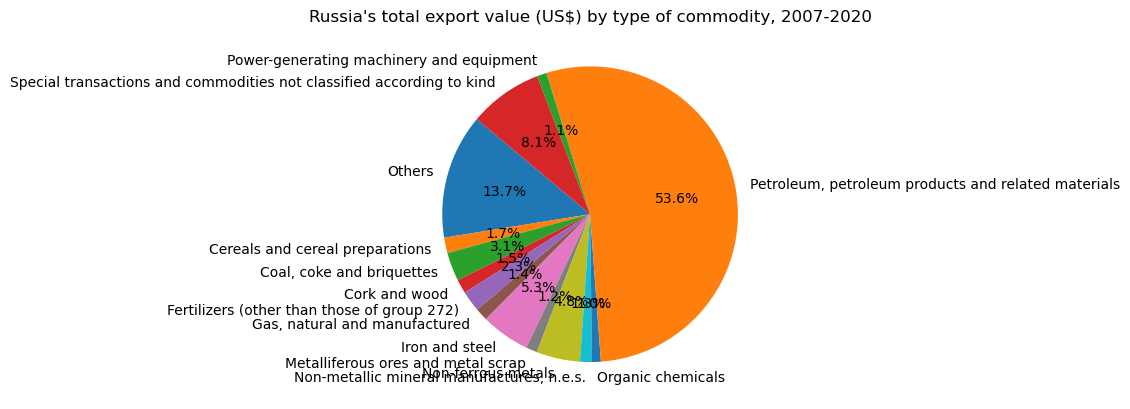

In [11]:
# sum up the trade value for each commodity
commodity_grouped = df.groupby('Commodity')['Trade Value (US$)'].sum().reset_index()
display(commodity_grouped)

# Set a threshold for grouping small categories into 'Others'
threshold = 5e10  # 10 billion US$

# Create a list for the updated categories and values
updated_commodities = ['Others']
updated_trade_values = [0]

# Iterate through the commodities and trade values
for commodity, value in zip(commodity_grouped['Commodity'],commodity_grouped['Trade Value (US$)']):
    if value < threshold:
        # If value is smaller than threshold, accumulate it in 'Others'
            updated_trade_values[0] += value
    else:
        updated_commodities.append(commodity)
        updated_trade_values.append(value)

plt.pie(updated_trade_values, labels=updated_commodities, autopct='%1.1f%%', startangle=140)
plt.title("Russia's total export value (US$) by type of commodity, 2007-2020")
plt.show()

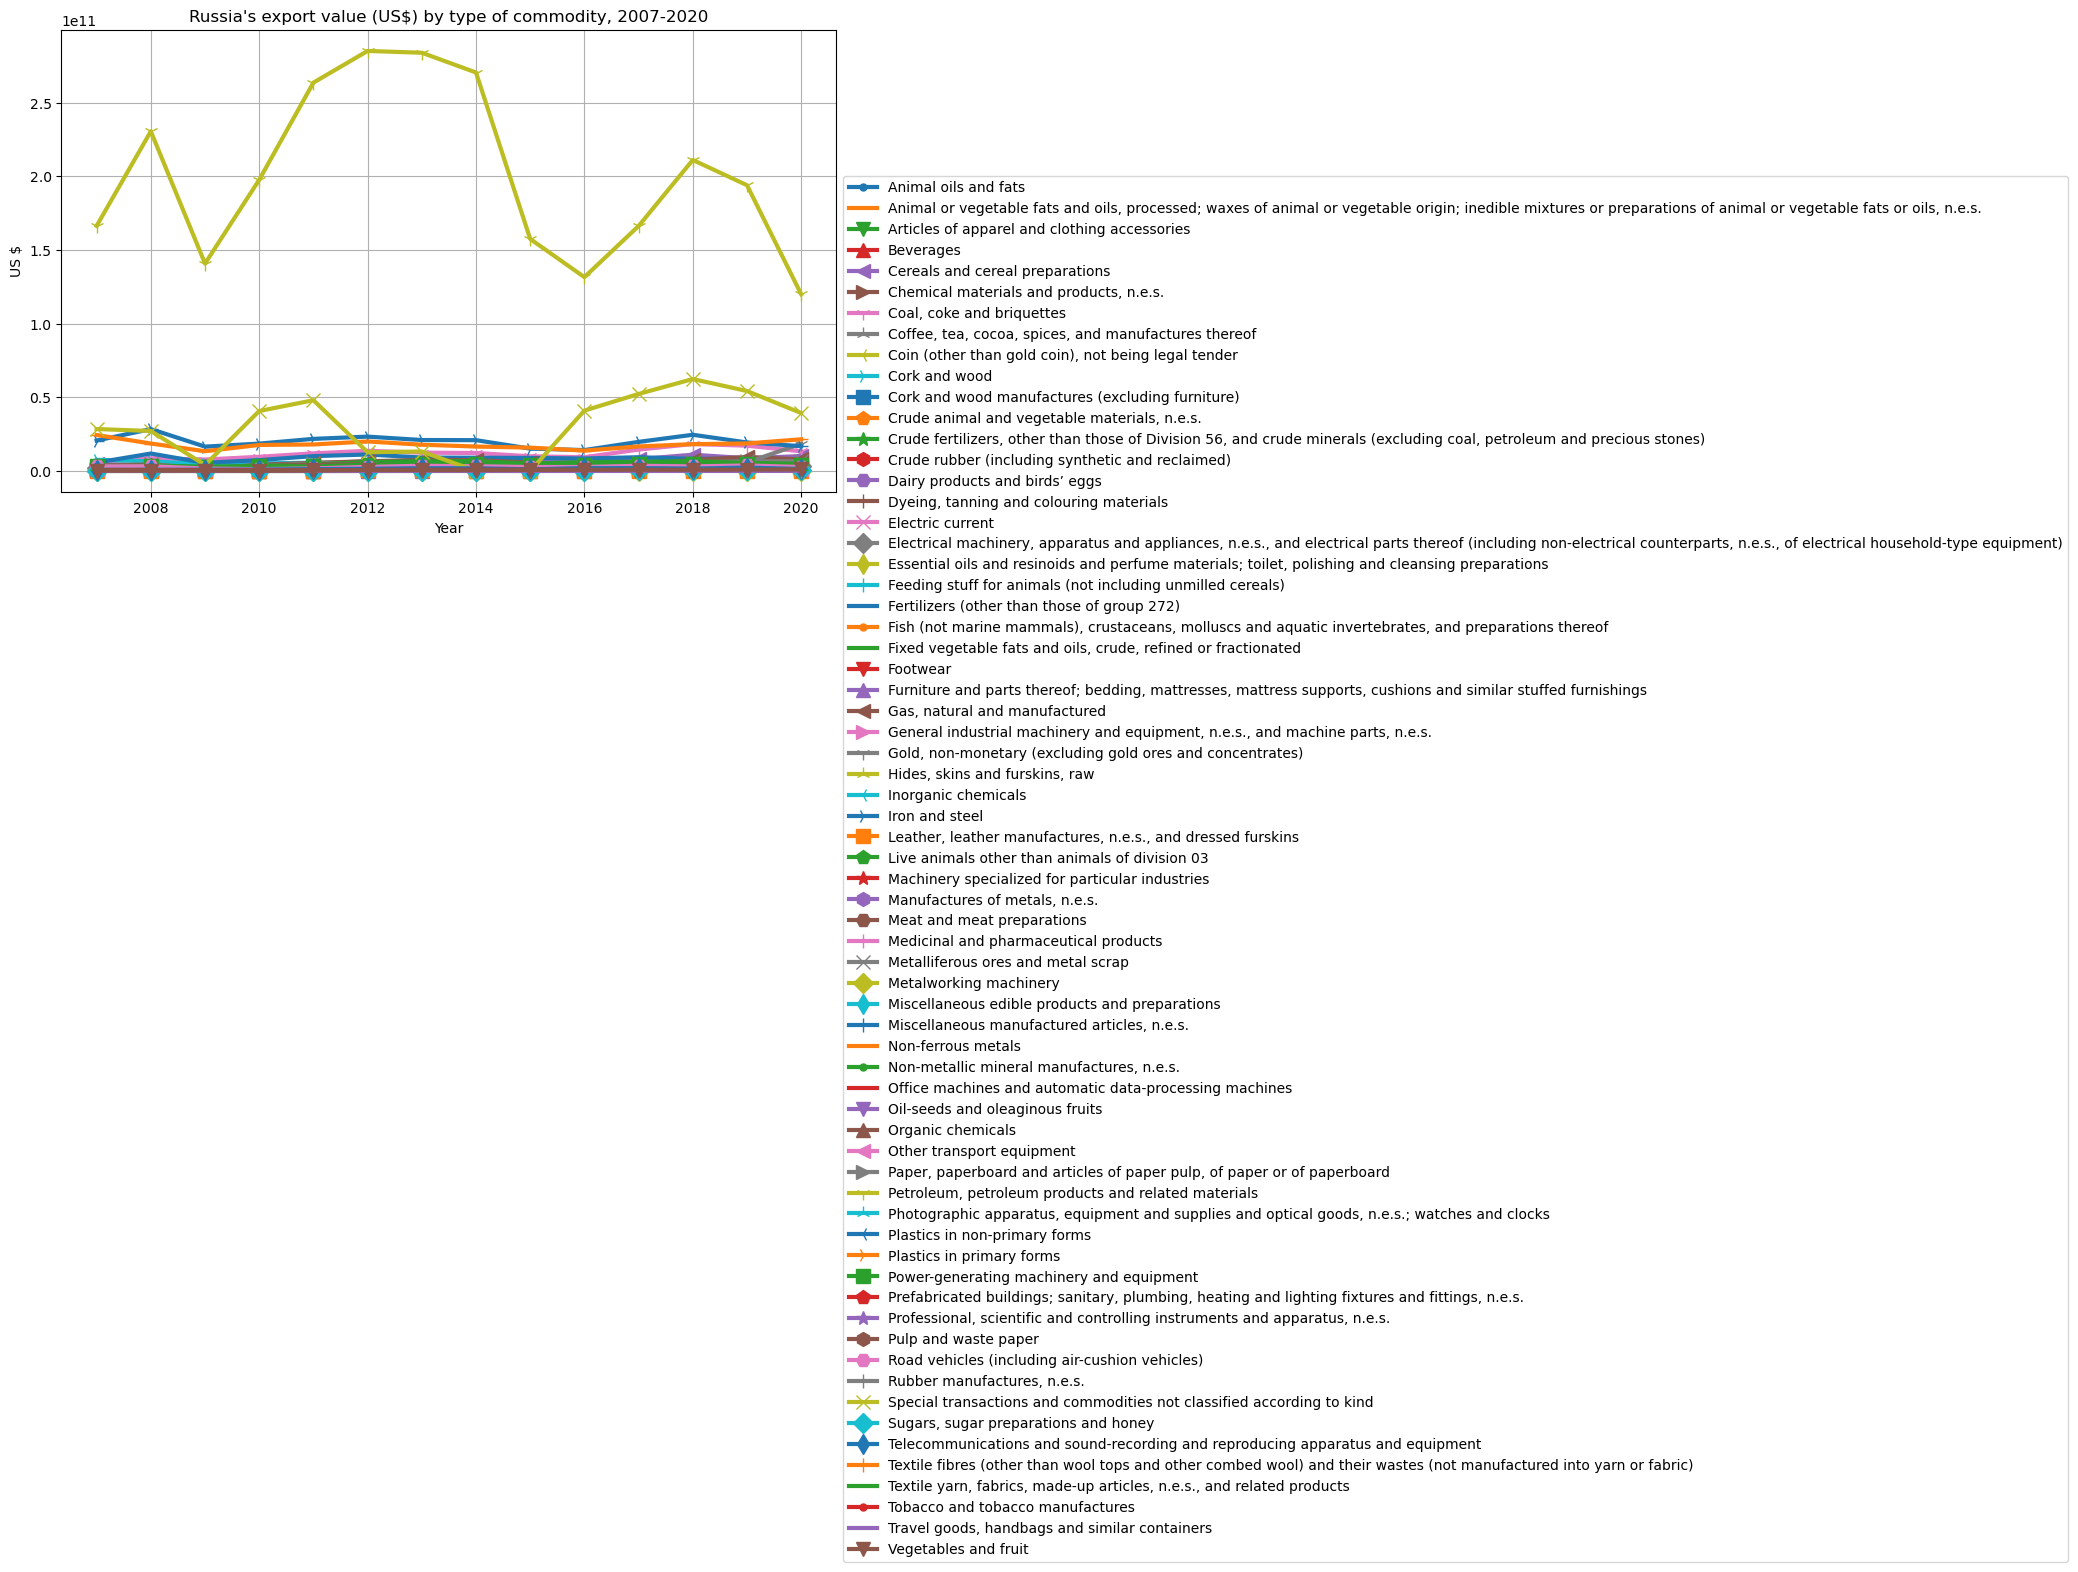

In [12]:
feature = 'Commodity'

commodity_by_time = df.groupby([feature, 'Year'])['Trade Value (US$)'].sum().reset_index()

markers = ['.', ',', 'v', '^', '<', '>', '1', '2', '3', '4', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
plt.figure(figsize=(10, 6))

for idx,continent in enumerate(commodity_by_time[feature].unique()):
    cont_fuel_by_year = commodity_by_time[commodity_by_time[feature] == continent]
    plt.plot(cont_fuel_by_year['Year'], cont_fuel_by_year['Trade Value (US$)'], 
             marker=markers[idx % len(markers)], markersize = 10, linestyle='-', linewidth=3, label=continent)

plt.xlabel('Year')
plt.ylabel('US $')
plt.title(f'Russia\'s export value (US$) by type of commodity, 2007-2020')
plt.grid(True)
plt.legend(commodity_by_time[feature].unique(),loc='upper left', bbox_to_anchor=(1, .7))
plt.show()

In [13]:
large_commodity = df.groupby('Commodity')['Trade Value (US$)'].sum().sort_values(ascending=False)
large_commodity = large_commodity.idxmax()
large_commodity

'Petroleum, petroleum products and related materials'

In [14]:
df_fuels = df[df['Commodity'] == large_commodity]
# 'Mineral fuels, lubricants and related materials'
df_fuels

,Year,Aggregate Level,Reporter ISO,Partner,Partner ISO,Commodity Code,Commodity,Qty Unit,Qty,Netweight (kg),Trade Value (US$),Continent,Region
48,2017,2,RUS,Central African Rep.,CAF,33,"Petroleum, petroleum products and related mate...",No Quantity,0,0,700,Africa,Central Africa
146,2020,2,RUS,Central African Rep.,CAF,33,"Petroleum, petroleum products and related mate...",No Quantity,0,0,118350,Africa,Central Africa
165,2008,2,RUS,Chad,TCD,33,"Petroleum, petroleum products and related mate...",No Quantity,<NA>,<NA>,5810,Africa,Central Africa
177,2009,2,RUS,Chad,TCD,33,"Petroleum, petroleum products and related mate...",No Quantity,<NA>,<NA>,936,Africa,Central Africa
334,2009,2,RUS,Chile,CHL,33,"Petroleum, petroleum products and related mate...",No Quantity,<NA>,<NA>,3612,Americas,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78655,2016,2,RUS,Yemen,YEM,33,"Petroleum, petroleum products and related mate...",No Quantity,0,0,1960168,Asia,South West Asia
78669,2017,2,RUS,Yemen,YEM,33,"Petroleum, petroleum products and related mate...",No Quantity,0,0,3277563,Asia,South West Asia
78683,2018,2,RUS,Yemen,YEM,33,"Petroleum, petroleum products and related mate...",No Quantity,0,0,4929655,Asia,South West Asia
78704,2019,2,RUS,Yemen,YEM,33,"Petroleum, petroleum products and related mate...",No Quantity,0,0,51951201,Asia,South West Asia


In [15]:
df_fuels.value_counts('Partner')

Partner
Afghanistan        14
Egypt              14
Norway             14
Other Asia, nes    14
Pakistan           14
                   ..
Norfolk Isds        1
Greenland           1
Rwanda              1
Samoa               1
Guam                1
Name: count, Length: 191, dtype: int64

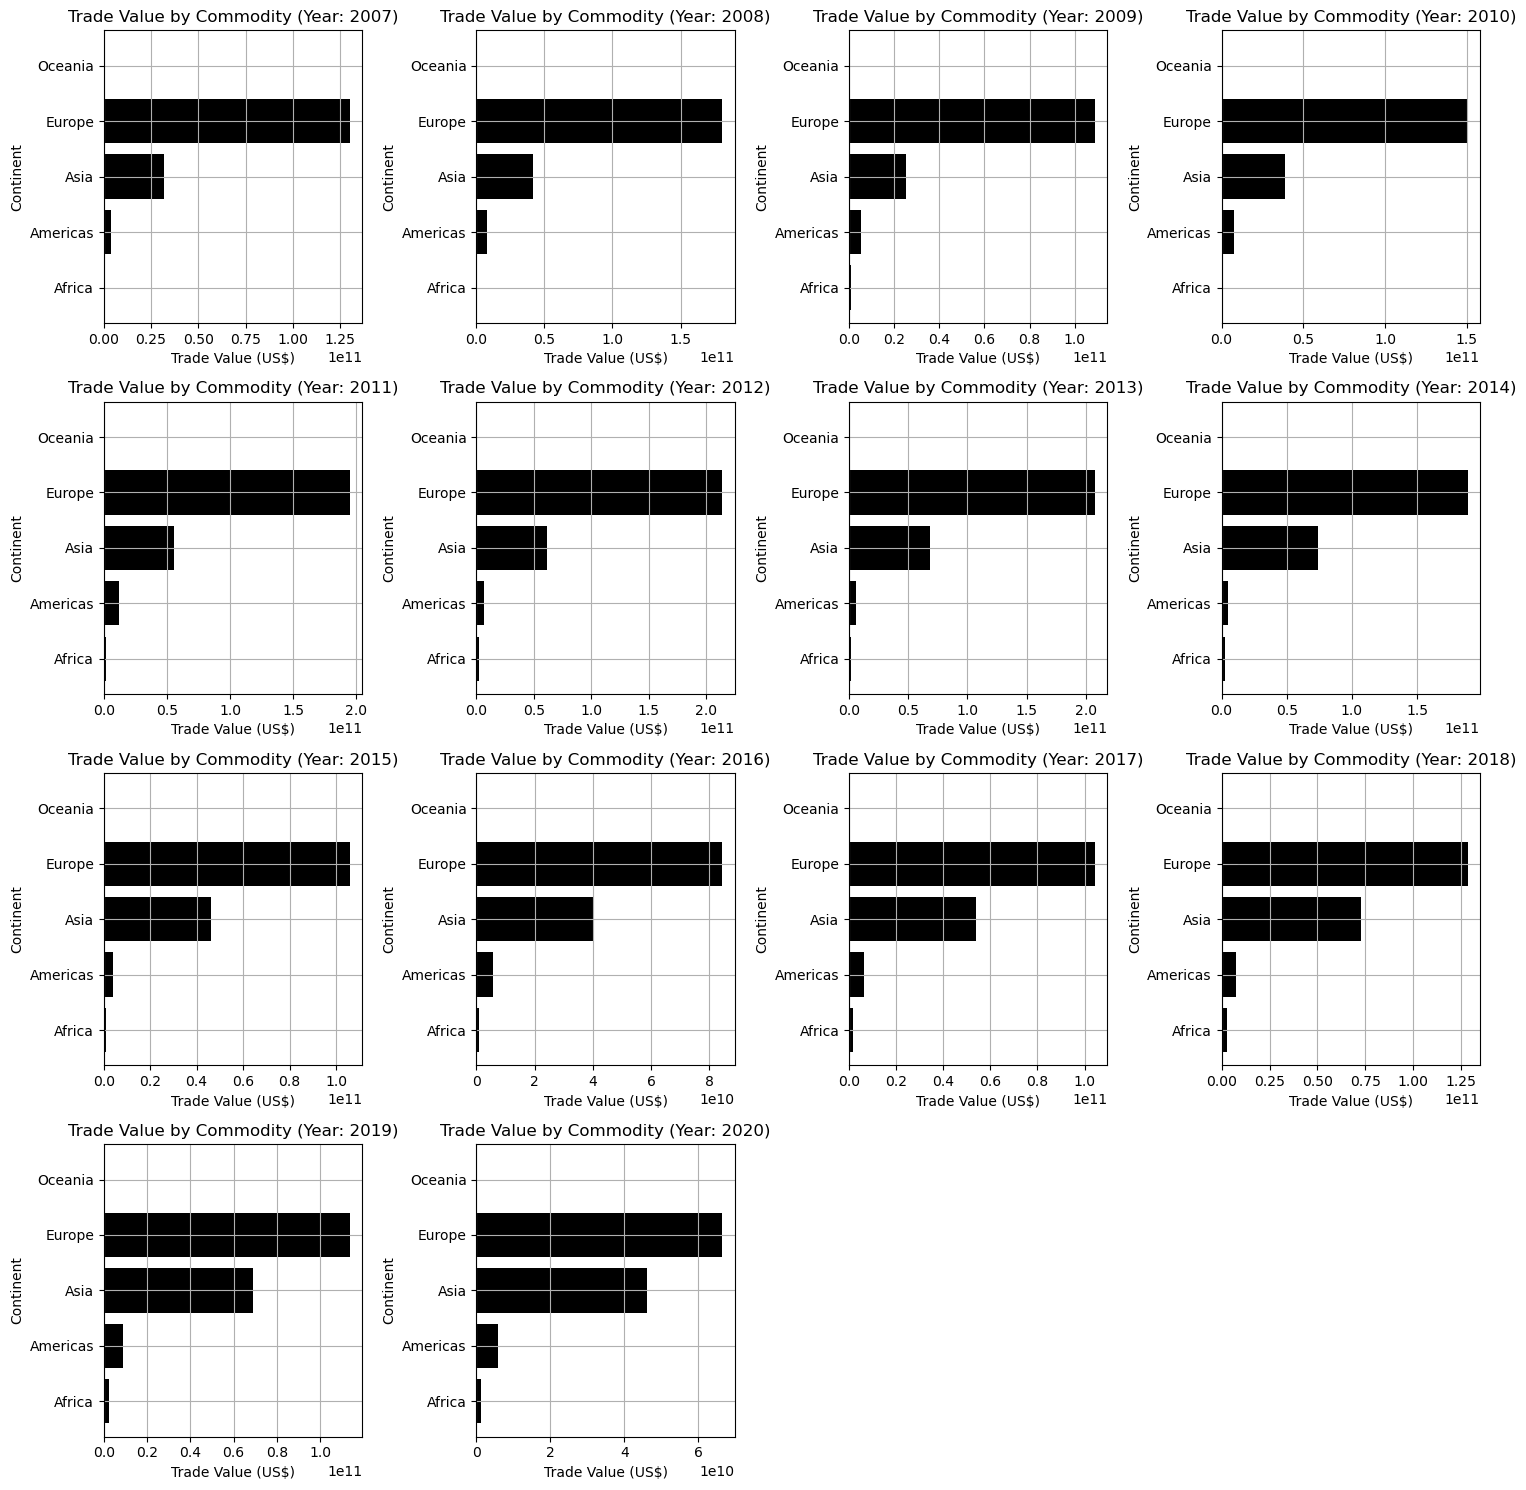

In [16]:
# Number of rows and columns for the grid
rows = 4
cols = 4

# Get the unique years
years = np.sort(df['Year'].unique())

# Create the subplots (5 rows, 3 columns)
fig, axes = plt.subplots(rows, cols, figsize=(15, 15)) 
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through the years and plot each year on a subplot
for idx, year in enumerate(years):
    ax = axes[idx]  # Get the axis for the current subplot
    df_fuel_year = df_fuels[df_fuels['Year'] == year]
    df_fuel_year_grouped_by_continent = df_fuel_year.groupby('Continent')['Trade Value (US$)'].sum().reset_index()
    
    ax.barh(df_fuel_year_grouped_by_continent.iloc[:,0], df_fuel_year_grouped_by_continent.iloc[:,1], color='black')
    ax.set_xlabel('Trade Value (US$)')
    ax.set_ylabel('Continent')
    ax.set_title(f'Trade Value by Commodity (Year: {year})')
    ax.grid(True)
# Remove empty subplots if there are less than 15 years
if len(years) < rows * cols:
    for idx in range(len(years), rows * cols):
        fig.delaxes(axes[idx])

# Adjust the layout to prevent overlapping

plt.tight_layout()
plt.show()


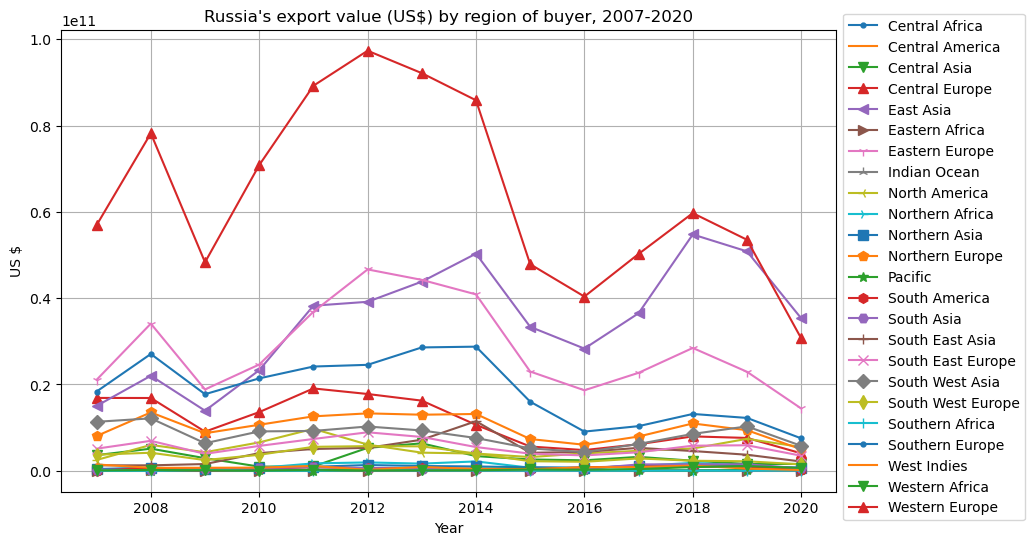

In [17]:
feature = 'Region' # Continent, Region, Partner

df_fuels_by_cont_and_time = df_fuels.groupby([feature, 'Year'])['Trade Value (US$)'].sum().reset_index()

markers = ['.', ',', 'v', '^', '<', '>', '1', '2', '3', '4', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|']
plt.figure(figsize=(10, 6))

for idx,continent in enumerate(df_fuels_by_cont_and_time[feature].unique()):
    cont_fuel_by_year = df_fuels_by_cont_and_time[df_fuels_by_cont_and_time[feature] == continent]
    plt.plot(cont_fuel_by_year['Year'], cont_fuel_by_year['Trade Value (US$)'], 
             marker=markers[idx % len(markers)], markersize = 7, linestyle='-', label=continent)

plt.xlabel('Year')
plt.ylabel('US $')
plt.title(f'Russia\'s export value (US$) by region of buyer, 2007-2020')
plt.grid(True)
plt.legend(df_fuels_by_cont_and_time[feature].unique(),loc='upper left', bbox_to_anchor=(1, 1.05))
plt.show()

## Time series clustering

### Data

In [29]:
df_fuels_by_partner_and_time = df_fuels.groupby(['Partner', 'Year'])['Trade Value (US$)'].sum().reset_index()
display(commodity_by_time) # commodity - year - trade value
display(df_fuels_by_partner_and_time) # region - year - trade value (of one commodity)

,Commodity,Year,Trade Value (US$)
0,Animal oils and fats,2007,114084
1,Animal oils and fats,2008,44232
2,Animal oils and fats,2009,626252
3,Animal oils and fats,2010,233497
4,Animal oils and fats,2011,460883
...,...,...,...
911,Vegetables and fruit,2016,772090911
912,Vegetables and fruit,2017,853055364
913,Vegetables and fruit,2018,812777860
914,Vegetables and fruit,2019,941686916


,Partner,Year,Trade Value (US$)
0,Afghanistan,2007,13391610
1,Afghanistan,2008,46744252
2,Afghanistan,2009,66812383
3,Afghanistan,2010,397221499
4,Afghanistan,2011,642302382
...,...,...,...
1824,Yemen,2016,1960168
1825,Yemen,2017,3277563
1826,Yemen,2018,4929655
1827,Yemen,2019,51951201


### Train

In [36]:
# SOM

import pandas as pd
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


def perform_som_clustering(df, n_clusters=5):
    """
    Perform time series clustering using SOM
    
    Parameters:
    df: pandas DataFrame with columns [Partner / Commodity, Year, Trade Value (US $)]
    n_clusters: number of clusters (determines SOM grid size)
    
    Return:
    DataFrame with cluster assignments and normalized data
    """
    num_iteration = 50000 

    # Pivot the data to create time series format
    target = df.columns[0] # could be Partner / Commodity
    value = df.columns[2]
    pivot_df = df.pivot(index=target, columns='Year', values=value)
    
    # Fill in nan data
    pivot_df = pivot_df.fillna(method='ffill').fillna(method='bfill')
    
    # Normalization
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(pivot_df)
    print(f'data shape = {normalized_data.shape}')
    
    # Calculate SOM grid size based on number of clusters
    if n_clusters <= 4:
        x_dim = 2
        y_dim = 2
    else:
        x_dim = int(np.ceil(n_clusters / 2))
        y_dim = 2

    # Initialize and train SOM
    som = MiniSom(
        x=x_dim,
        y=y_dim,
        input_len=normalized_data.shape[1],
        sigma=1.0,
        learning_rate=0.5,
        neighborhood_function='gaussian',
        topology='rectangular',
        activation_distance='euclidean',
        random_seed=42
    )
    
    som.random_weights_init(normalized_data)
    som.train_random(normalized_data, num_iteration)

    # Get cluster assignments and check for empty clusters
    cluster_labels = []
    cluster_set = set()
    
    for row in normalized_data:
        winner = som.winner(row)
        cluster_label = winner[0] * y_dim + winner[1]
        cluster_label = min(cluster_label, n_clusters - 1)
        cluster_labels.append(cluster_label)
        cluster_set.add(cluster_label)
    
    # Remap cluster labels to eliminate gaps
    cluster_map = {old: new for new, old in enumerate(sorted(cluster_set))}
    cluster_labels = [cluster_map[label] for label in cluster_labels]
    
    # Create result DataFrame
    results_df = pd.DataFrame({
        'target': pivot_df.index,
        'cluster': cluster_labels
    })
    
    # Add normalized time series data
    for i, year in enumerate(pivot_df.columns):
        results_df[f'normalized_{year}'] = normalized_data[:, i]
    
    # results_df: ['target', 'cluster', 'normalized_years']
    return results_df, som, normalized_data, pivot_df.columns

def plot_cluster_all(results_df, years, target):
    """
    Plot all cluster curves
    """
    plt.figure(figsize=(12, 8))
    
    # Only plot non-empty clusters
    actual_clusters = sorted(results_df['cluster'].unique())
    
    for cluster in actual_clusters:
        cluster_data = results_df[results_df['cluster'] == cluster]
        data = cluster_data[[f'normalized_{year}' for year in years]].mean()
        plt.plot(years, data, label=f'Cluster {cluster+1}')
    
    if target == 'Partner':
        plt.title('Time Series Clustering of Trading Partners')
    else:
        plt.title('Time Series Clustering of Commodities')

    plt.xlabel('Year')
    plt.ylabel('Normalized Trade Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    
    return plt

def plot_each_cluster(data, n_clusters, som, series_names, target, save_dir="cluster_plots", years=range(2007, 2021)):
    """
    Plot each cluster with individual series and means, and save plots
    """
    import os
    from textwrap import wrap
    
    # Create directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Create color pattern
    colors = plt.cm.rainbow(np.linspace(0, 1, len(data)))
    
    # Get the mapping of data points to clusters
    win_map = som.win_map(data)
    
    # Create a dict to map data points to their names
    data_dict = {tuple(d): n for d, n in zip(data, series_names)}
    
    # function to wrap long labels
    def wrap_labels(text, width=30):
        return '\n'.join(wrap(text, width))
    
    # Get actual cluster tuples (x,y coordinates)
    actual_clusters = []
    for cluster_idx in range(n_clusters):
        x = cluster_idx // 2
        y = cluster_idx % 2
        if (x, y) in win_map:
            actual_clusters.append((x, y))
        
    # Plot each non-empty cluster
    for new_idx, cluster in enumerate(actual_clusters, 1):
        plt.figure(figsize=(12, 8))
        
        cluster_series = win_map[cluster]
        
        # Obtain mean series
        mean_series = np.average(np.vstack(cluster_series), axis=0)
        
        # Calculate correlation with mean
        correlations = []
        for series in cluster_series:
            corr = np.corrcoef(series, mean_series)[0, 1]
            correlations.append(corr)
        
        # Sort series by correlation
        sorted_indices = np.argsort(correlations)[::-1]
        
        numlimit = 20
        # Plot each series with different colors and labels
        for i, idx in enumerate(sorted_indices):
            series = cluster_series[idx]
            series_name = data_dict[tuple(series)]
            
            # limit the number of labels in legend
            if i < numlimit:
                label = wrap_labels(series_name) # if the label is too long, wrap it
            elif i == numlimit:
                label = "..."
            else:
                label = "_nolegend_"
            
            plt.plot(years, series, color=colors[idx], alpha=0.7, label=label)
        
        # Plot mean series with thick black line
        plt.plot(years, mean_series, color='black', linewidth=3, label='Cluster Mean')
        
        plt.legend(bbox_to_anchor=(1.05, 1),
                  loc='upper left',
                  fontsize='small',
                  ncol=1)
        
        if target == "Partner":
            plt.title(f"Trading Partner Clustering - Cluster {new_idx}")
        else:
            plt.title(f"Commodity Clustering - Cluster {new_idx}")
        plt.xlabel('Year')
        plt.ylabel('Normalized Trade Value')
        plt.grid(True)
        
        plt.xticks(years, rotation=45)
        plt.tight_layout()
        
        # Save the plot with new continuous numbering
        if target == "Partner":
            plt.savefig(os.path.join(save_dir, f'partner_cluster_{new_idx}.png'),
                        bbox_inches='tight',
                        dpi=300)
        else:
            plt.savefig(os.path.join(save_dir, f'commodity_cluster_{new_idx}.png'),
                        bbox_inches='tight',
                        dpi=300)
        plt.close()

    print(f"Plots have been saved to '{save_dir}'")

def get_cluster_members(results_df, n_clusters):
    """
    Get list of lists containing members in each cluster
    """
    cluster_members = []
    
    for i in range(n_clusters):
        members = results_df[results_df['cluster'] == i]['target'].tolist()
        cluster_members.append(members)
    
    return cluster_members

def run_som_analysis(df, n_clusters=5):
    """
    Run the complete SOM analysis and plot results
    """
    target = df.columns[0] # could be Partner / Commodity

    # Perform clustering
    results, som, normalized_data, years = perform_som_clustering(df, n_clusters)
    
    series_names = results['target'].values
    
    # Plot results
    plot_cluster_all(results, years, target)

    plot_each_cluster(normalized_data, n_clusters, som, series_names, target)

    clusters = get_cluster_members(results, n_clusters)
    
    return results, normalized_data, som, clusters

/var/folders/9_/58l571hj21b2l5n5cprjr_5m0000gn/T/ipykernel_50322/3644273968.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df = pivot_df.fillna(method='ffill').fillna(method='bfill')


data shape = (191, 14)
Plots have been saved to 'cluster_plots'


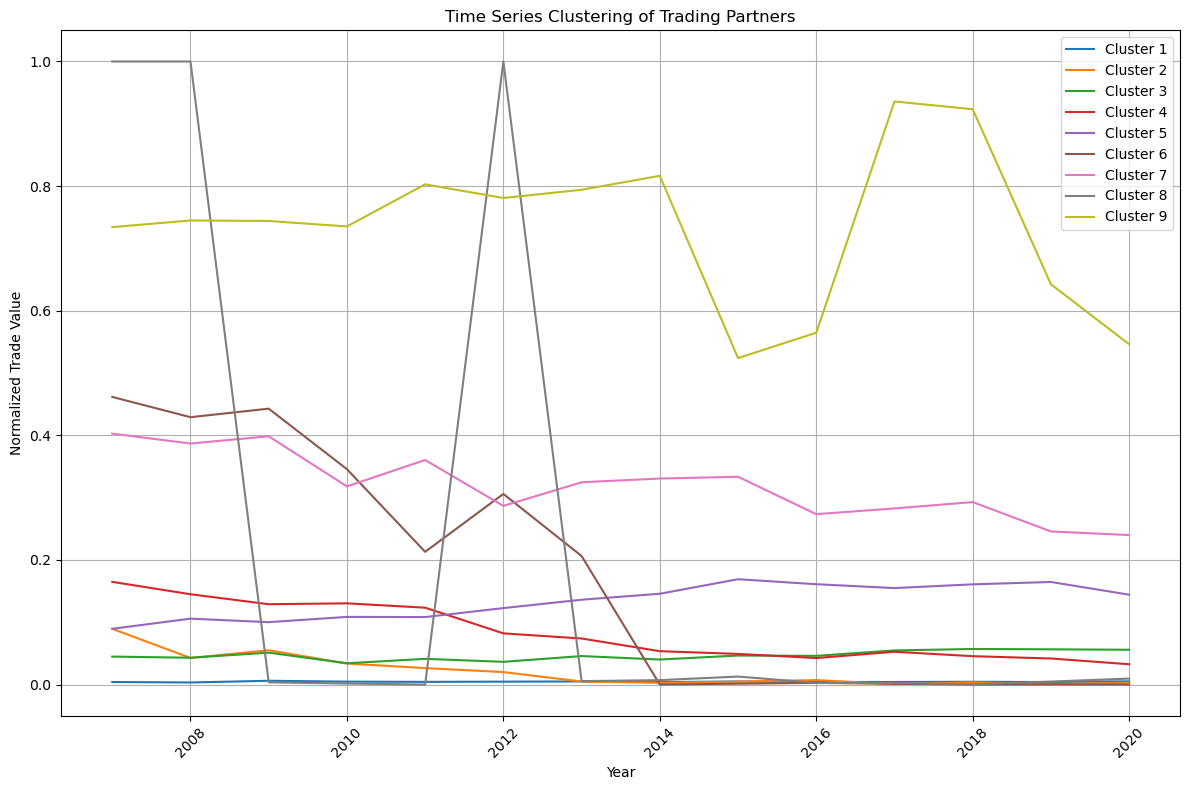

In [37]:
n_clusters = 9
results, data, som, clusters = run_som_analysis(df_fuels_by_partner_and_time, n_clusters)

In [38]:
for i, cluster in enumerate(clusters):
    print(f'cluster {i+1} = {cluster}')

cluster 1 = ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belize', 'Benin', 'Bermuda', 'Bolivia (Plurinational State of)', 'Bonaire', 'Bosnia Herzegovina', 'Br. Indian Ocean Terr.', 'Br. Virgin Isds', 'Brazil', 'Brunei Darussalam', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China, Hong Kong SAR', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', "Côte d'Ivoire", "Dem. People's Rep. of Korea", 'Dem. Rep. of the Congo', 'Djibouti', 'Dominica', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'FS Micronesia', 'Faeroe Isds', 'Falkland Isds (Malvinas)', 'Fiji', 'Georgia', 'Gibraltar', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Kyrgyzstan', "Lao People's Dem. Rep.", 'Lebanon', 'Liberia', 'Libya', 'Malaysia', 'Maldives', 

/var/folders/9_/58l571hj21b2l5n5cprjr_5m0000gn/T/ipykernel_50322/3644273968.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df = pivot_df.fillna(method='ffill').fillna(method='bfill')


data shape = (66, 14)
Plots have been saved to 'cluster_plots'


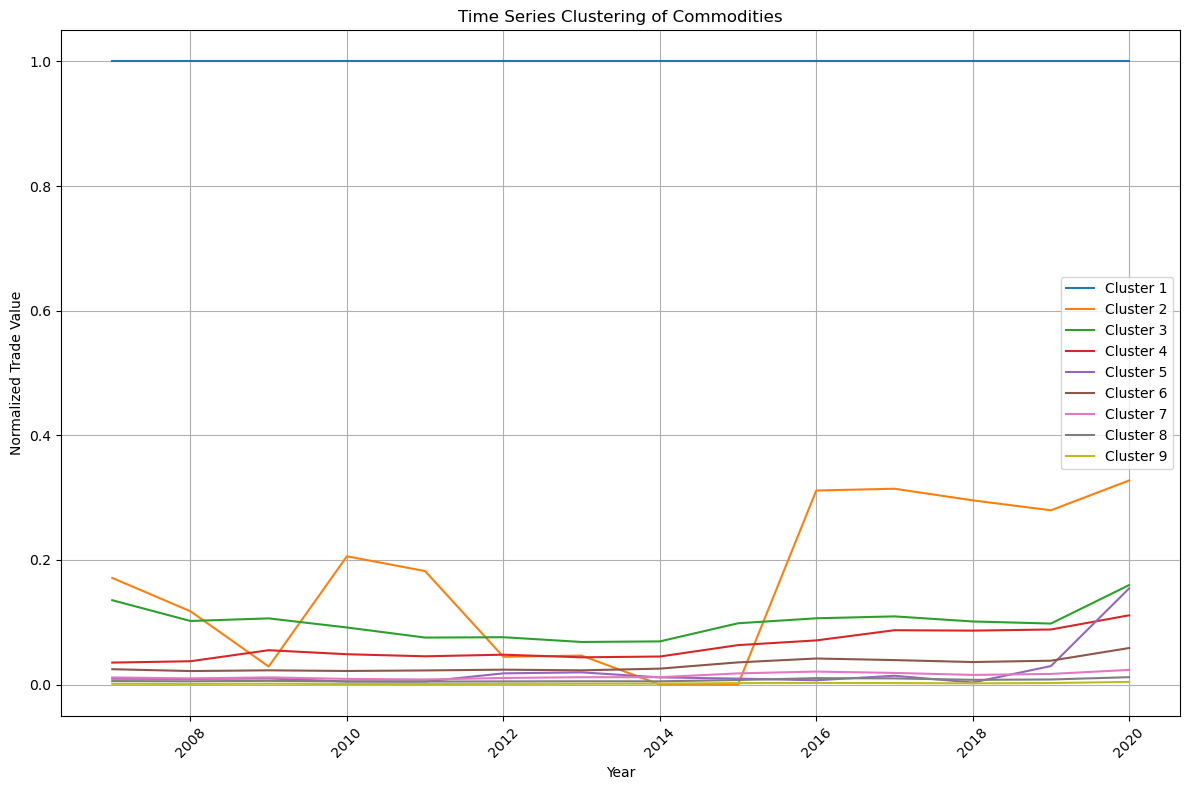

In [39]:
n_clusters = 10
results, data, som, clusters = run_som_analysis(commodity_by_time, n_clusters)

In [40]:
for i, cluster in enumerate(clusters):
    print(f'cluster {i+1} = {cluster}')

cluster 1 = ['Petroleum, petroleum products and related materials']
cluster 2 = ['Special transactions and commodities not classified according to kind']
cluster 3 = ['Iron and steel', 'Non-ferrous metals']
cluster 4 = ['Coal, coke and briquettes']
cluster 5 = ['Gold, non-monetary (excluding gold ores and concentrates)']
cluster 6 = ['Cereals and cereal preparations', 'Cork and wood', 'Fertilizers (other than those of group 272)', 'Gas, natural and manufactured', 'Metalliferous ores and metal scrap', 'Non-metallic mineral manufactures, n.e.s.']
cluster 7 = ['Electrical machinery, apparatus and appliances, n.e.s., and electrical parts thereof (including non-electrical counterparts, n.e.s., of electrical household-type equipment)', 'Fish (not marine mammals), crustaceans, molluscs and aquatic invertebrates, and preparations thereof', 'Fixed vegetable fats and oils, crude, refined or fractionated', 'General industrial machinery and equipment, n.e.s., and machine parts, n.e.s.', 'Inorganic